Data loaded successfully.
Shape before cleaning: (30, 11)
Shape after cleaning: (30, 11)


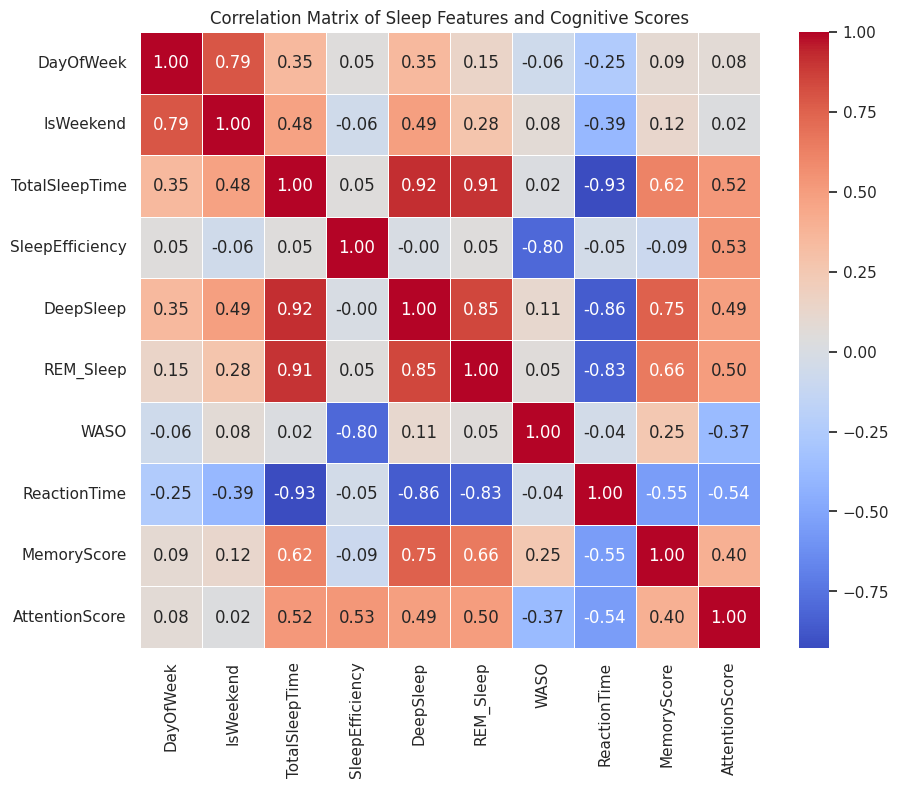

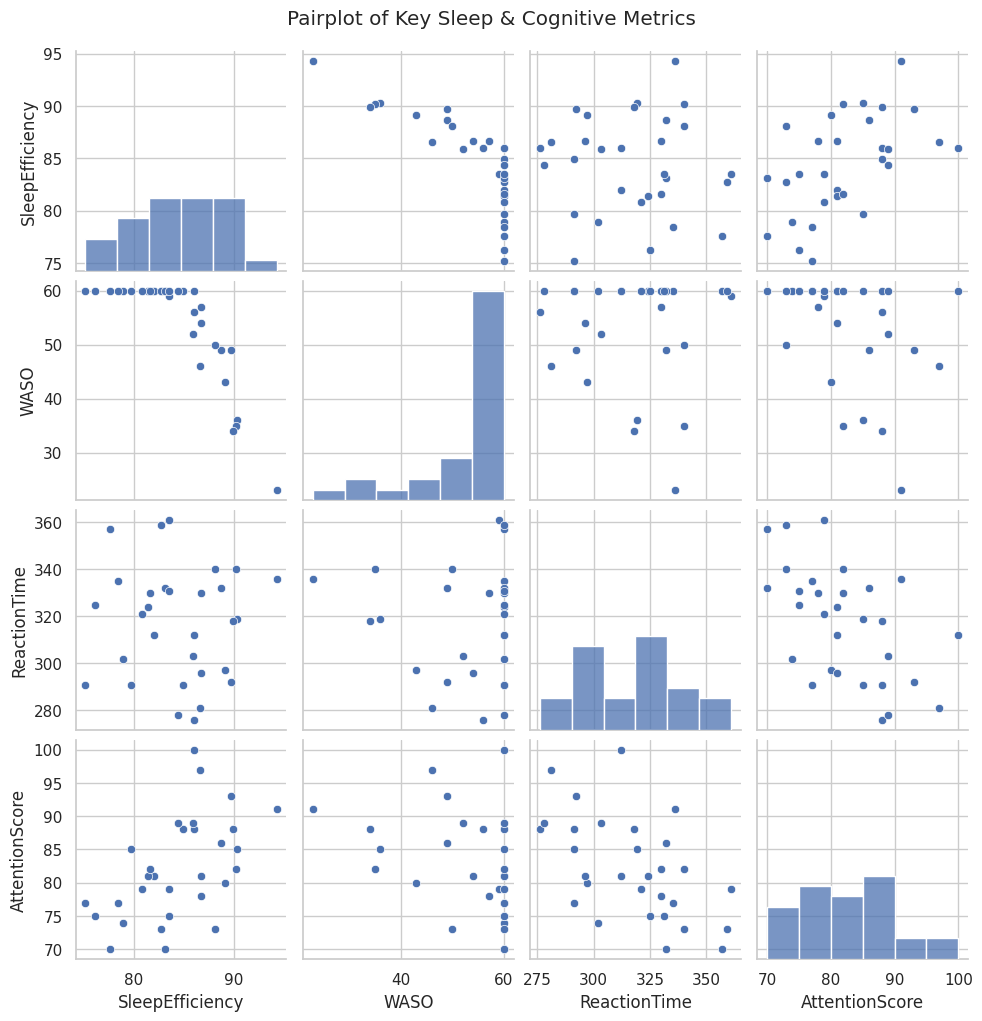

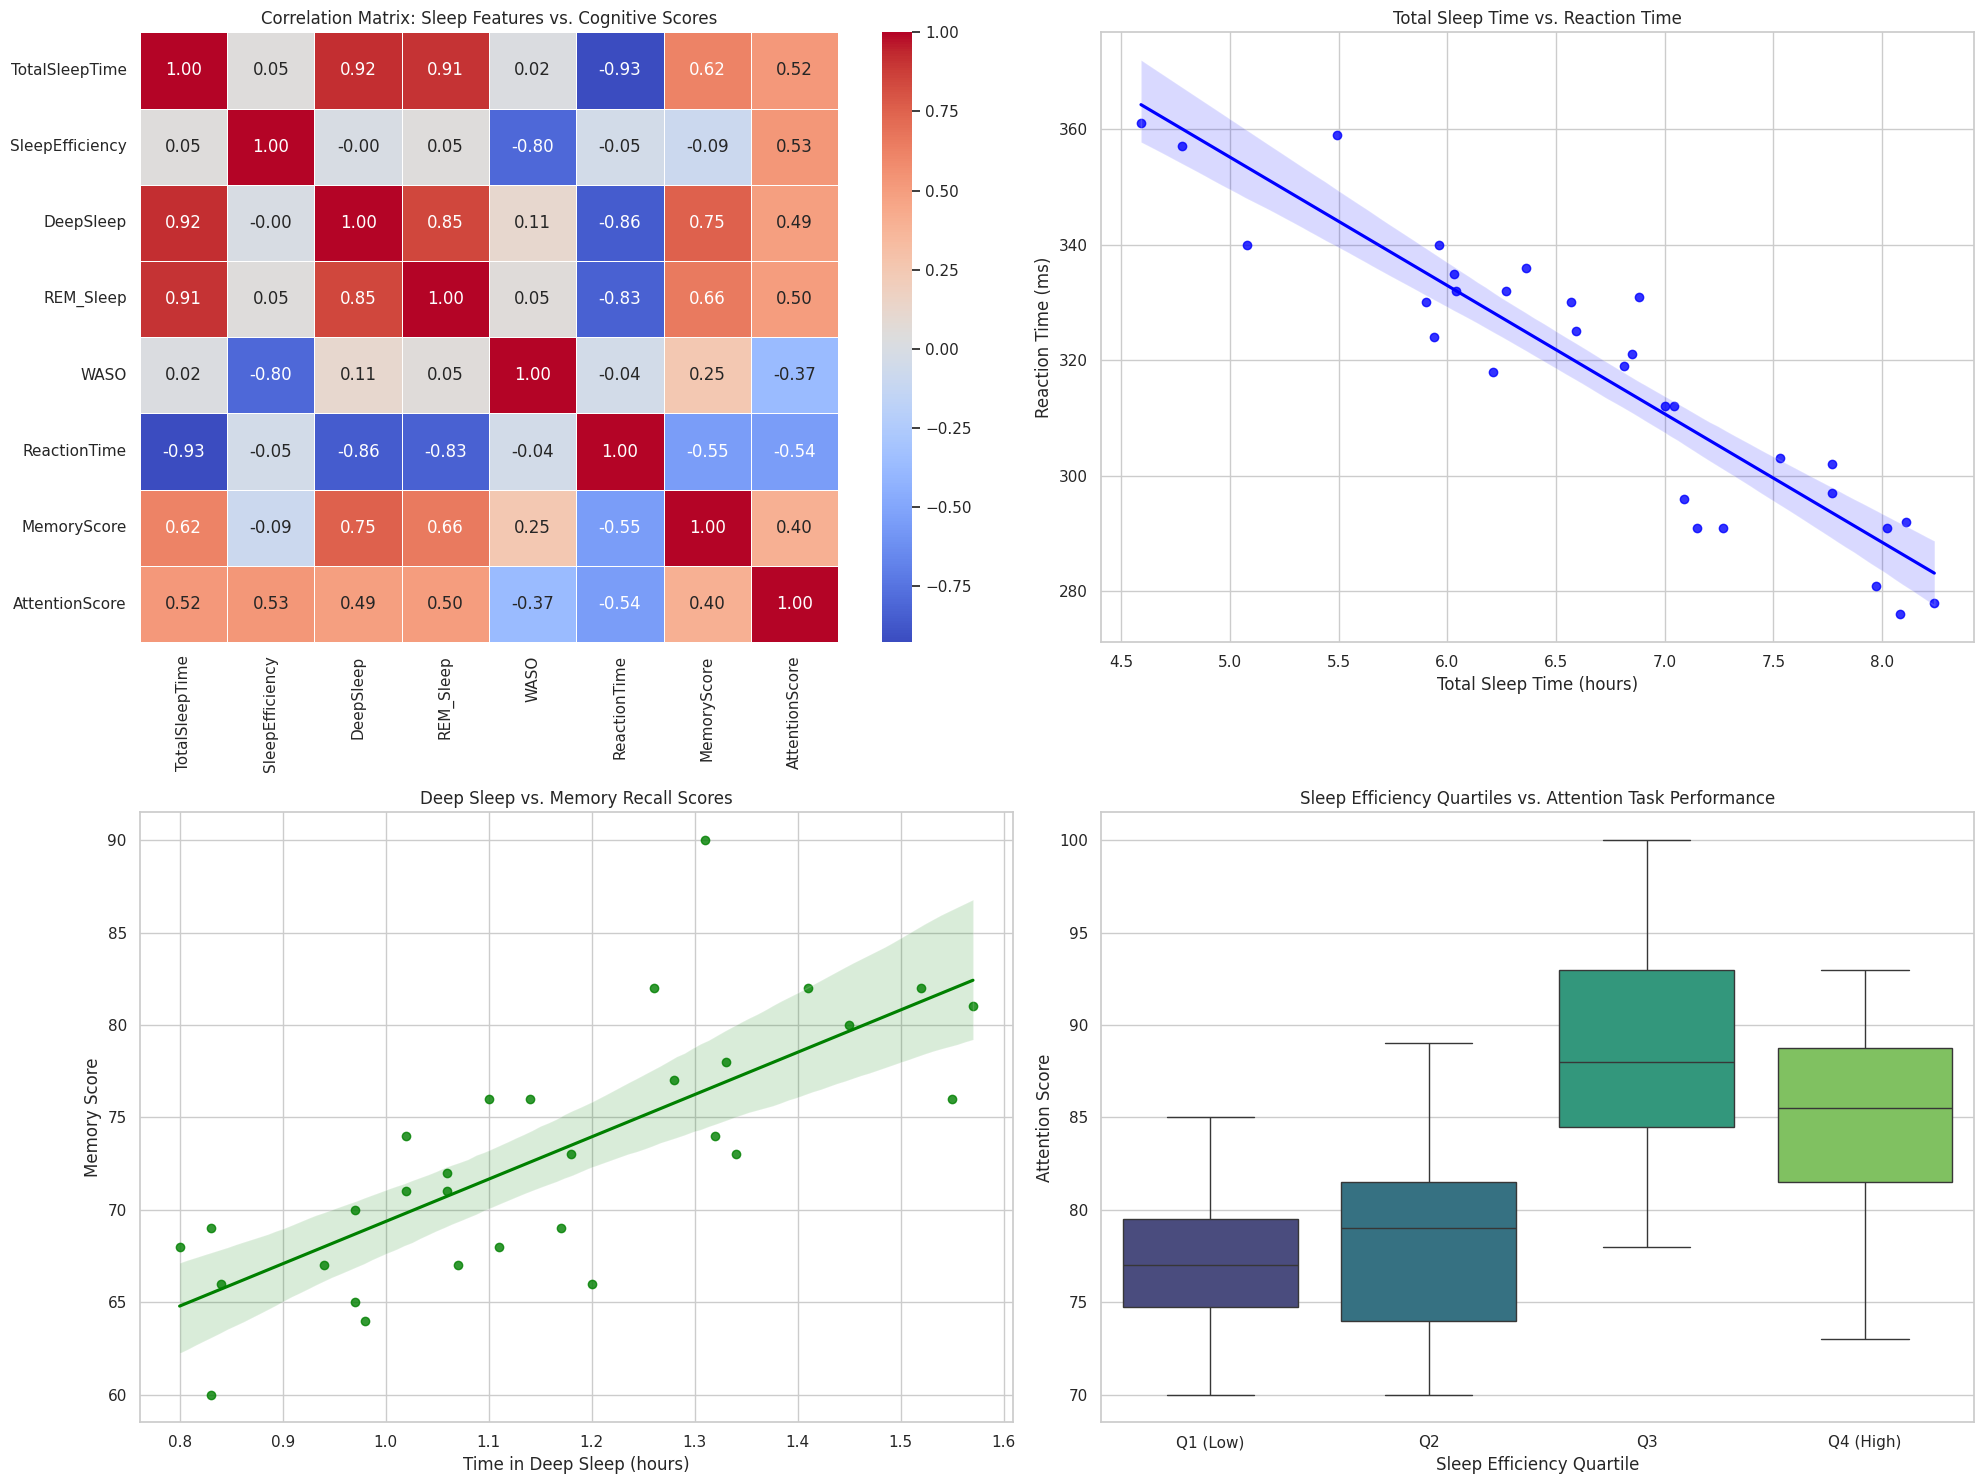


HYPOTHESIS TESTING RESULTS

1. Hypothesis: Total Sleep Time vs. Reaction Time
   Pearson Correlation (r): -0.928
   P-value: 0.00000
   Result: Reject Null Hypothesis. Significant relationship found.

2. Hypothesis: Deep Sleep vs. Memory Recall
   Pearson Correlation (r): 0.754
   P-value: 0.00000
   Result: Reject Null Hypothesis. Significant relationship found.

3. Hypothesis: WASO vs. Attention Score
   Pearson Correlation (r): -0.375
   P-value: 0.04117
   Result: Reject Null Hypothesis. Significant relationship found.


STARTING ML ANALYSIS
Features used for prediction: ['TotalSleepTime', 'SleepEfficiency', 'DeepSleep', 'REM_Sleep', 'WASO']

--- Model Comparison Results ---
   Linear Regression | R2: -0.6408 | CV R2: 0.5887 | MAE: 10.01
    Ridge Regression | R2: -0.4314 | CV R2: 0.6102 | MAE: 9.38
       Random Forest | R2: -0.3680 | CV R2: 0.6412 | MAE: 10.10
   Gradient Boosting | R2: -0.0301 | CV R2: 0.6001 | MAE: 8.29

--- Optimizing Random Forest with Grid Search ---
Best P

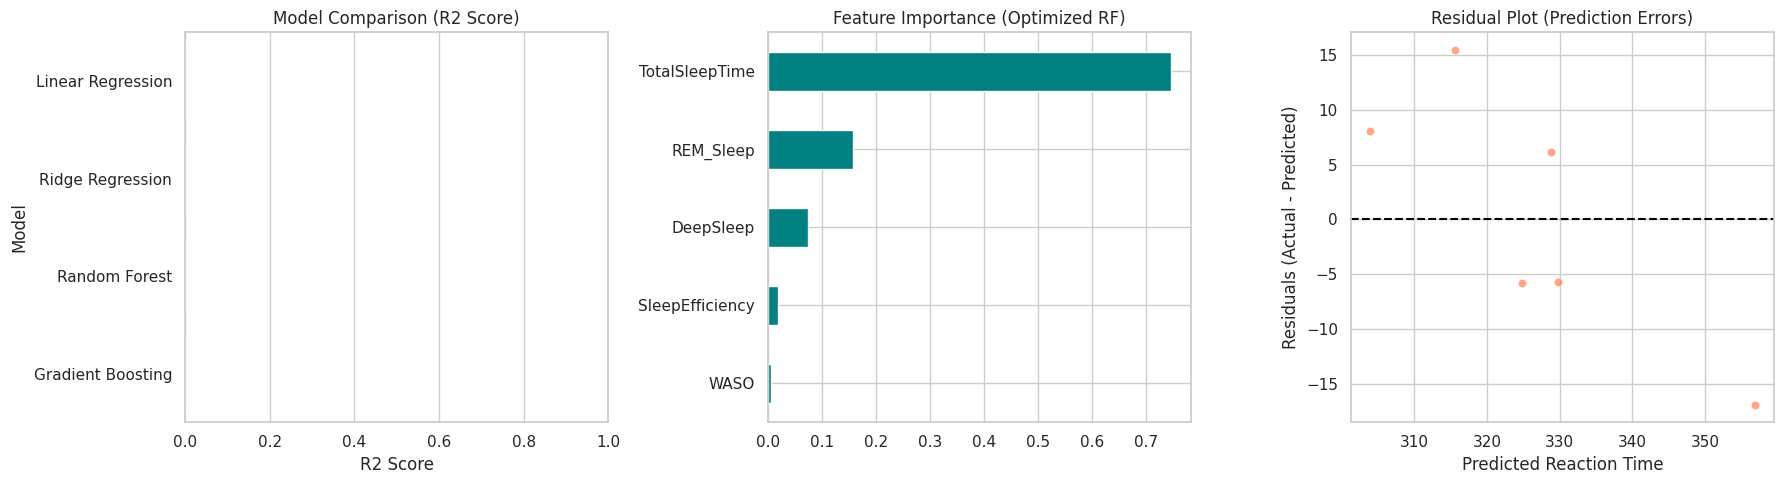

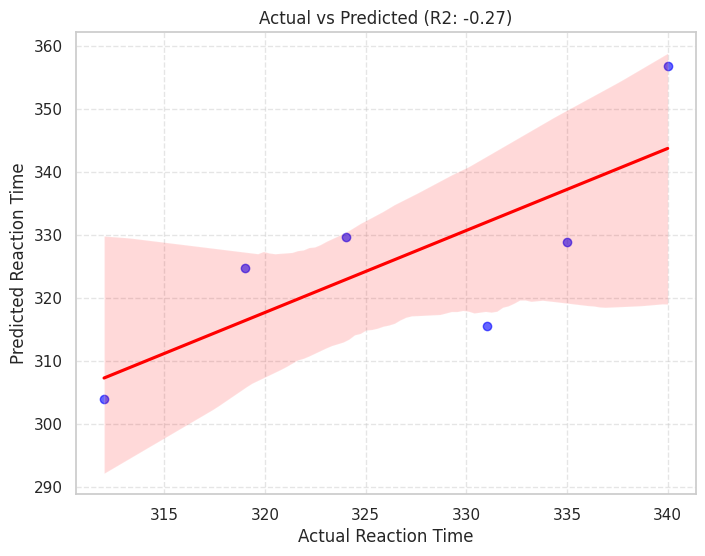

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ---------------------------------------------------------
# 1. DATA COLLECTION AND PROCESSING
# ---------------------------------------------------------

# Define the file path
file_path = 'DSA210_ProjectData.csv'

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: File '{file_path}' not found. Please check the file name.")
    exit()

# Standardize the Date format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Data Cleaning: Handle missing values
print(f"Shape before cleaning: {df.shape}")
df.dropna(inplace=True)
print(f"Shape after cleaning: {df.shape}")

# ---------------------------------------------------------
# 2. DATA VISUALIZATION & INSIGHTS
# ---------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Visualizations (Exploratory Data Analysis) ---

# 1. Correlation Matrix (Heatmap)
# This visualization shows the strength of linear relationships between all variables.
# It helps identify which sleep metrics correlate most strongly with cognitive scores.
plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Generate the heatmap
# annot=True adds the correlation coefficient numbers to the squares
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sleep Features and Cognitive Scores")
plt.show()

# 2. Pairplot (For selected key features)
# This visualizes the distribution of single variables and relationships between pairs.
# It allows us to see scatter plots for specific relationships (e.g., Sleep Duration vs Reaction Time).
selected_features = ['SleepDuration', 'SleepEfficiency', 'WASO', 'ReactionTime', 'AttentionScore']

# Filter to include only columns that actually exist in the dataframe to prevent errors
existing_features = [col for col in selected_features if col in df.columns]

if existing_features:
    sns.pairplot(df[existing_features])
    plt.suptitle("Pairplot of Key Sleep & Cognitive Metrics", y=1.02) # Adjust title position
    plt.show()
else:
    print("Selected columns were not found in the dataset.")

# Set visualization style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# A. Heatmap: Correlation Matrix
# We select only numeric columns to avoid errors
numeric_cols = ['TotalSleepTime', 'SleepEfficiency', 'DeepSleep', 'REM_Sleep',
                'WASO', 'ReactionTime', 'MemoryScore', 'AttentionScore']

plt.subplot(2, 2, 1)
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Sleep Features vs. Cognitive Scores')

# B. Lineplot (Regression Plot): Total Sleep Time vs. Reaction Time
plt.subplot(2, 2, 2)
sns.regplot(x='TotalSleepTime', y='ReactionTime', data=df, color='blue', marker='o')
plt.title('Total Sleep Time vs. Reaction Time')
plt.xlabel('Total Sleep Time (hours)')
plt.ylabel('Reaction Time (ms)')

# C. Lineplot (Regression Plot): Deep Sleep vs. Memory Recall Scores
plt.subplot(2, 2, 3)
sns.regplot(x='DeepSleep', y='MemoryScore', data=df, color='green', marker='o')
plt.title('Deep Sleep vs. Memory Recall Scores')
plt.xlabel('Time in Deep Sleep (hours)')
plt.ylabel('Memory Score')

# D. Boxplots: Sleep Efficiency Quartiles vs. Attention Task Performance
# Create quartiles for Sleep Efficiency
df['Efficiency_Quartile'] = pd.qcut(df['SleepEfficiency'], q=4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])

plt.subplot(2, 2, 4)
# FIX: Added hue parameter and set legend=False to avoid FutureWarnings
sns.boxplot(x='Efficiency_Quartile', y='AttentionScore', data=df, hue='Efficiency_Quartile', palette="viridis", legend=False)
plt.title('Sleep Efficiency Quartiles vs. Attention Task Performance')
plt.xlabel('Sleep Efficiency Quartile')
plt.ylabel('Attention Score')

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 3. HYPOTHESIS TESTING
# ---------------------------------------------------------

print("\n" + "="*50)
print("HYPOTHESIS TESTING RESULTS")
print("="*50)

# Test 1: Total Sleep Time vs. Reaction Time
# Expectation: Negative correlation (More sleep -> Lower/Faster reaction time)
r_reaction, p_reaction = stats.pearsonr(df['TotalSleepTime'], df['ReactionTime'])

print(f"\n1. Hypothesis: Total Sleep Time vs. Reaction Time")
print(f"   Pearson Correlation (r): {r_reaction:.3f}")
print(f"   P-value: {p_reaction:.5f}")

if p_reaction < 0.05:
    print("   Result: Reject Null Hypothesis. Significant relationship found.")
else:
    print("   Result: Fail to reject Null Hypothesis. No significant relationship.")

# Test 2: Deep Sleep vs. Memory Score
# Expectation: Positive correlation (More deep sleep -> Higher memory score)
r_memory, p_memory = stats.pearsonr(df['DeepSleep'], df['MemoryScore'])

print(f"\n2. Hypothesis: Deep Sleep vs. Memory Recall")
print(f"   Pearson Correlation (r): {r_memory:.3f}")
print(f"   P-value: {p_memory:.5f}")

if p_memory < 0.05:
    print("   Result: Reject Null Hypothesis. Significant relationship found.")
else:
    print("   Result: Fail to reject Null Hypothesis. No significant relationship.")

# Test 3: WASO (Wake After Sleep Onset) vs. Attention Score
# Expectation: Negative correlation (Higher WASO -> Lower Attention)
r_attention, p_attention = stats.pearsonr(df['WASO'], df['AttentionScore'])

print(f"\n3. Hypothesis: WASO vs. Attention Score")
print(f"   Pearson Correlation (r): {r_attention:.3f}")
print(f"   P-value: {p_attention:.5f}")

if p_attention < 0.05:
    print("   Result: Reject Null Hypothesis. Significant relationship found.")
else:
    print("   Result: Fail to reject Null Hypothesis. No significant relationship.")

print("\n" + "="*50)

# ---------------------------------------------------------
# 4.  MACHINE LEARNING ANALYSIS
# ---------------------------------------------------------
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*50)
print("STARTING ML ANALYSIS")
print("="*50)

# --- 1. Feature Engineering & Selection ---
target_col = 'ReactionTime'
feature_candidates = ['SleepDuration', 'TotalSleepTime', 'SleepEfficiency', 'DeepSleep', 'REM', 'REM_Sleep', 'WASO', 'Age', 'CaffeineIntake']
feature_cols = [col for col in feature_candidates if col in df.columns]

if target_col in df.columns and feature_cols:
    X = df[feature_cols]
    y = df[target_col]

    print(f"Features used for prediction: {feature_cols}")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # --- 2. Train-Test Split ---
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # --- 3. Multi-Model Comparison ---
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(alpha=1.0),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42)
    }

    results = []

    print("\n--- Model Comparison Results ---")
    for name, model in models.items():

        model.fit(X_train, y_train)


        y_pred = model.predict(X_test)


        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)


        cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
        avg_cv_score = cv_scores.mean()

        results.append({
            "Model": name,
            "MSE": mse,
            "MAE": mae,
            "R2 Score": r2,
            "CV Mean R2": avg_cv_score
        })

        print(f"{name:>20} | R2: {r2:.4f} | CV R2: {avg_cv_score:.4f} | MAE: {mae:.2f}")


    results_df = pd.DataFrame(results)

    # --- 4. Hyperparameter Tuning (Random Forest Optimization) ---
    print("\n--- Optimizing Random Forest with Grid Search ---")


    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }

    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_rf = grid_search.best_estimator_
    print(f"Best Parameters found: {grid_search.best_params_}")

    y_pred_best = best_rf.predict(X_test)
    r2_best = r2_score(y_test, y_pred_best)
    print(f"Optimized Random Forest R2: {r2_best:.4f}")

    # --- 5. Visualizations ---
    plt.figure(figsize=(18, 5))

    # A. Model Comparison Bar Chart
    plt.subplot(1, 3, 1)
    sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')
    plt.title('Model Comparison (R2 Score)')
    plt.xlim(0, 1)

    # B. Feature Importance (Best Model)
    plt.subplot(1, 3, 2)
    feature_importances = pd.Series(best_rf.feature_importances_, index=feature_cols)
    feature_importances.sort_values(ascending=True).plot(kind='barh', color='teal')
    plt.title('Feature Importance (Optimized RF)')

    # C. Residual Plot (Analysing errors)
    residuals = y_test - y_pred_best
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=y_pred_best, y=residuals, color='coral', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Residual Plot (Prediction Errors)')
    plt.xlabel('Predicted Reaction Time')
    plt.ylabel('Residuals (Actual - Predicted)')

    plt.tight_layout()
    plt.show()

    # D. Actual vs Predicted Plot (Final)
    plt.figure(figsize=(8, 6))
    sns.regplot(x=y_test, y=y_pred_best, scatter_kws={'alpha':0.6, 'color':'blue'}, line_kws={'color':'red'})
    plt.xlabel('Actual Reaction Time')
    plt.ylabel('Predicted Reaction Time')
    plt.title(f'Actual vs Predicted (R2: {r2_best:.2f})')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

else:
    print(f"Error: Target '{target_col}' or features not found in dataset. Please check column names.")
